### (0 баллов) Считываем данные

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [ ]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [ ]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Переведем данные в датафрейм

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['Price'] = pd.Series(dataset.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Данные чистые, без проспусков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
y = df["Price"]
X = df.drop("Price", axis=1)

In [ ]:
y = df["Price"]
X = df.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = lin_reg.predict(X_test)
pred, pred.shape

(array([29.3639579 , 36.18916482, 14.05923305, 24.76681233, 18.79788306,
        23.24853399, 17.67925163, 13.52689687, 23.47852891, 20.64157306,
        25.09931716, 18.95745403, -5.20884417, 21.49578209, 19.70582791,
        25.88188533, 20.58810146,  6.32255133, 40.53496182, 17.70625559,
        27.18358564, 30.26489811, 11.44273418, 23.67928093, 18.3134012 ,
        16.68382624, 22.70408601, 15.00807515, 22.63999482, 19.26595697,
        23.18874623, 25.13865453, 25.45744382, 18.65563   , 17.14694386,
        17.09774591, 30.86149933, 20.30925718, 23.6643961 , 24.16999127,
        14.02229608, 32.76422241, 42.75995463, 17.52640822, 27.33820148,
        17.4795262 , 14.37833428, 25.34949499, 20.51753419, 30.15497476,
        21.71831626]), (51,))

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [ ]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

test_mse = np.array([1, 2, 3, 4, 5])
test_mse2 = np.array([6, 7, 8, 9, 10])
MSE(test_mse, test_mse2), mean_squared_error(test_mse, test_mse2)

(25.0, 25.0)

In [ ]:
mse = MSE(y_test, pred)
print(f"Ошибка на тренировочной выборки: {round(mse, 3)}")

Ошибка на тренировочной выборки: 14.996


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
simple = np.zeros(y_test.shape) + y_test.mean()

In [ ]:
mean_pred = MSE(simple, y_test)
print(f"Ошибка наивоного алгоритма: {round(mean_pred, 3)}")
print(f"Лучше на {round(mean_pred - mse, 3)}")

Ошибка наивоного алгоритма: 62.434
Лучше на 47.438


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

###Регулязация с подбором параметра $\alpha$

In [ ]:
def get_min(mse, alpha):
  return mse.min(), alpha[mse.argmin()]

In [ ]:
def draw_scatter(x, y):
  min_mse, min_alpha = get_min(y, x)
  plt.scatter(x, y)
  plt.scatter(min_alpha, min_mse, c="r")
  plt.xlabel("Alpha")
  plt.ylabel("MSE")
  plt.show()

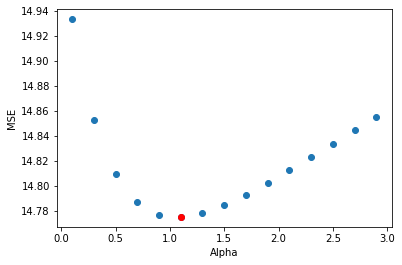


Оптимальная alpha = 1.1000000000000003
MSE = 14.775296466176155


In [ ]:
koeffs = np.arange(0.1, 3.0, 0.2)
koeffs_errors = {"alpha": [], "mse": []}

for alpha in koeffs:
    reg = Ridge(alpha=alpha, random_state=42).fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    koeffs_errors["alpha"].append(alpha)
    koeffs_errors["mse"].append(MSE(y_pred, y_test))

koeffs_errors["alpha"] = np.array(koeffs_errors["alpha"])
koeffs_errors["mse"] = np.array(koeffs_errors["mse"])

draw_scatter(koeffs_errors["alpha"], koeffs_errors["mse"])

mse, min_alpha = get_min(koeffs_errors["mse"], koeffs_errors["alpha"])

print(f"\nОптимальная alpha = {min_alpha}")
print(f"MSE = {mse}")

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

В данном случае, ошибка с регулязацией 14.8, без регулязации - 15

Опимальный коэффициент: 1.1

MSE при этом коэффициенте: 14.7

Регулязация чуть-чуть улучшила результат. Наверное из-за того, что данные были простые регулязация не смогла сильно улучшить результат.